In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('medv',axis=1), data['medv'], test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((354, 13), (152, 13))

# گسسته‌سازی  و رمزگذاری با کتابخانه feature_engine

 این روش ترکیب دو مرحله متوالی هست یکس گسسته‌سازی که ویژگی عددی به بازه‌های گسسته تبدیل میشود و مرحله بعد مرزگذاری طبقه‌ای که باکتهای گسسته به عددهایی که مدل بتواند پردازش کند تبدیل میشود

In [4]:
pip install --upgrade feature engine

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement feature (from versions: none)
ERROR: No matching distribution found for feature


In [6]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [11]:
temp = EqualFrequencyDiscretiser(q=10, variables=['lstat','dis','rm'], return_object=True)
x_train = x_train.fillna(0.1)
x_test = x_test.fillna(0.1)
temp.fit(x_train)

EqualFrequencyDiscretiser(return_object=True, variables=['lstat', 'dis', 'rm'])

In [12]:
train_t = temp.transform(x_train)
test_t = temp.transform(x_test)

ببینیم آیا باکتها با هدف رابطه خطی دارند یا نه. برای این کار میانگین قیمت خانه‌ها را برای سطوح مختلف از ویژگی dis محاسبه میکنیم و نمودار آن را رسم میکنیم

Text(0, 0.5, 'mean of price')

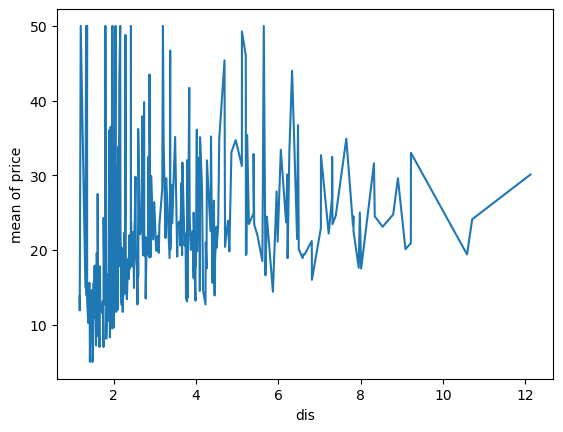

In [13]:
pd.concat([x_train, y_train], axis=1).groupby('dis')['medv'].mean().plot()
plt.ylabel('mean of price')

In [16]:
from feature_engine.encoding import OrdinalEncoder

In [17]:
oenc = OrdinalEncoder(encoding_method = 'ordered')
oenc.fit(train_t, y_train)

OrdinalEncoder()

In [18]:
train_t = oenc.transform(train_t)
test_t = oenc.transform(test_t)

<Axes: xlabel='dis'>

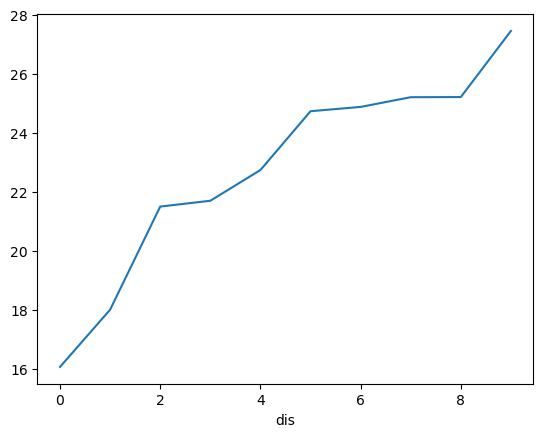

In [19]:
pd.concat([train_t, y_train],axis=1).groupby('dis')['medv'].mean().plot()